<a href="https://colab.research.google.com/github/Raymay3/MAT422/blob/main/HW%201.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.2.1 Linear Spaces**
**1.2.1.1 Linear Combinations**

A *linear combination* in linear algebra involves combining vectors using scalar multiplication and addition. Here is how to implement and visualize linear combinations and subspaces in Python:

In [ ]:
import numpy as np

# Example 1: Linear Combinations
# Define two vectors in R^3
w1 = np.array([1, 2, 3])
w2 = np.array([4, 5, 6])

# Define scalars
alpha = 2
beta = 3

# Linear combination of w1 and w2
linear_combination = alpha * w1 + beta * w2
print("Linear Combination of alpha * w1 + beta * w2:", linear_combination)

# Example 2: Verify a Linear Subspace
# Define a set of vectors in R^3
u1 = np.array([1, 0, 0])
u2 = np.array([0, 1, 0])
u3 = np.array([0, 0, 1])

# Check closure under vector addition and scalar multiplication
# Vector addition
u_sum = u1 + u2
print("Sum of u1 and u2:", u_sum)

# Scalar multiplication
scalar = 2
u_scaled = scalar * u1
print("Scalar multiplication of u1 by 2:", u_scaled)

# Verify that 0 is in the subspace
zero_vector = np.array([0, 0, 0])
print("Zero vector:", zero_vector)

Linear Combination of alpha * w1 + beta * w2: [14 19 24]
Sum of u1 and u2: [1 1 0]
Scalar multiplication of u1 by 2: [2 0 0]
Zero vector: [0 0 0]


# **1.2.2 Orthogonality**

**1. Verify if a Set of Vectors Forms an Orthonormal Basis**

An *orthonormal basis* of a vector space is a set of vectors that are all orthogonal to each other, and each has a norm of 1.

In [ ]:
import numpy as np

# Define a set of vectors
vectors = np.array([
    [1/np.sqrt(2), 1/np.sqrt(2)],
    [-1/np.sqrt(2), 1/np.sqrt(2)]
])

# Function to check if a set of vectors is orthonormal
def is_orthonormal(vectors):
    for i in range(len(vectors)):
        for j in range(len(vectors)):
            dot_product = np.dot(vectors[i], vectors[j])
            if i == j:
                if not np.isclose(dot_product, 1):
                    return False
            else:
                if not np.isclose(dot_product, 0):
                    return False
    return True

# Check if the vectors form an orthonormal set
print("Orthonormal Basis Check:", is_orthonormal(vectors))

Orthonormal Basis Check: True


**2. Pythagorean Theorem in Vector Spaces**

This example demonstrates the *Pythagorean theorem* for orthogonal vectors.

In [ ]:
# Define two orthogonal vectors
u = np.array([1, 0])
v = np.array([0, 1])

# Verify orthogonality and apply Pythagorean theorem
def pythagorean_theorem(u, v):
    if np.dot(u, v) == 0:
        return np.linalg.norm(u + v)**2 == np.linalg.norm(u)**2 + np.linalg.norm(v)**2
    else:
        return False

print("Pythagorean Theorem Verification:", pythagorean_theorem(u, v))

Pythagorean Theorem Verification: False


**3. Cauchy–Schwarz Inequality**

The *Cauchy–Schwarz inequality* states that for any vectors $u$ and $v$,

| $u$ ⋅ $v$ | ≤ ||$u$|| ⋅ ||$v$||.

In [ ]:
import numpy as np  # Import the NumPy library and give it the alias 'np'

# Define two arbitrary vectors
u = np.array([1, 2, 3])
v = np.array([4, 5, 6])

# Verify Cauchy–Schwarz inequality
def cauchy_schwarz(u, v):
    dot_product = np.dot(u, v)
    norm_u = np.linalg.norm(u)
    norm_v = np.linalg.norm(v)
    return abs(dot_product) <= norm_u * norm_v

print("Cauchy–Schwarz Inequality Verification:", cauchy_schwarz(u, v))

Cauchy–Schwarz Inequality Verification: True


**4. Orthonormal Basis Expansion**

*Expand* a vector in terms of an *orthonormal basis*.

In [ ]:
# Orthonormal basis vectors
q1 = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
q2 = np.array([-1/np.sqrt(2), 1/np.sqrt(2)])

# Any vector u in the span of q1, q2
u = np.array([1, 0])

# Expansion of u in terms of q1, q2
alpha1 = np.dot(u, q1)
alpha2 = np.dot(u, q2)
u_expanded = alpha1 * q1 + alpha2 * q2

print("Original Vector:", u)
print("Expanded Vector:", u_expanded)

Original Vector: [1 0]
Expanded Vector: [1. 0.]


**5. Best Approximation Theorem**

Find the *best approximation* of a vector $v$ in a subspace $U$.

In [ ]:
# Define a vector v and an orthonormal basis of subspace U
v = np.array([3, 4])
q1 = np.array([1, 0])

# Projection of v onto U
v_star = np.dot(v, q1) * q1

print("Vector v:", v)
print("Best approximation v* in U:", v_star)

Vector v: [3 4]
Best approximation v* in U: [3 0]


**6. Orthogonal Projection Matrix**

Compute the *orthogonal projection matrix* $P$ = $QQ^T$ for a subspace and use it for projections.

In [ ]:
# Define the orthonormal basis vectors as columns of matrix Q
Q = np.array([[1/np.sqrt(2), -1/np.sqrt(2)],
              [1/np.sqrt(2), 1/np.sqrt(2)]])

# Projection matrix P
P = Q @ Q.T

# Project a vector onto the subspace defined by the columns of Q
v = np.array([3, 4])
projection_v = P @ v

print("Projection matrix P:\n", P)
print("Projection of v onto subspace U:\n", projection_v)

Projection matrix P:
 [[ 1.00000000e+00 -2.23711432e-17]
 [-2.23711432e-17  1.00000000e+00]]
Projection of v onto subspace U:
 [3. 4.]


# **1.2.3. Gram–Schmidt process**

**1. Implementing the Gram-Schmidt Process**

The *Gram-Schmidt process* takes a set of linearly independent vectors and generates an orthonormal set of vectors that span the same subspace. Let's implement this process step-by-step:

In [ ]:
import numpy as np

def gram_schmidt(vectors):
    """
    Apply the Gram-Schmidt process to a set of linearly independent vectors.

    Parameters:
    vectors (ndarray): An array where each row represents a vector.

    Returns:
    ndarray: An array where each row represents an orthonormal vector.
    """
    # Number of vectors
    n = vectors.shape[0]

    # Initialize an empty array for orthonormal vectors
    orthonormal_basis = np.zeros_like(vectors)

    for i in range(n):
        # Start with the current vector
        vi = vectors[i]

        # Subtract the projection of vi onto each of the previous orthonormal vectors
        for j in range(i):
            vj = orthonormal_basis[j]
            projection = np.dot(vi, vj) * vj
            vi = vi - projection

        # Normalize the vector to make it orthonormal
        norm = np.linalg.norm(vi)
        if norm > 1e-10:  # Ensure the vector is not zero
            orthonormal_basis[i] = vi / norm

    return orthonormal_basis

# Example usage of the Gram-Schmidt process
# Define a set of linearly independent vectors
a1 = np.array([1, 1, 0])
a2 = np.array([1, 0, 1])
a3 = np.array([0, 1, 1])

# Stack them into a single matrix
vectors = np.vstack([a1, a2, a3])

# Apply the Gram-Schmidt process
orthonormal_basis = gram_schmidt(vectors)

print("Original Vectors:")
print(vectors)
print("\nOrthonormal Basis:")
print(orthonormal_basis)

Original Vectors:
[[1 1 0]
 [1 0 1]
 [0 1 1]]

Orthonormal Basis:
[[0 0 0]
 [0 0 0]
 [0 0 0]]


**2. Verifying the Orthonormal Basis**

We will verify that the resulting vectors are orthonormal:

In [ ]:
def verify_orthonormality(basis):
    """
    Verify if a set of vectors forms an orthonormal basis.

    Parameters:
    basis (ndarray): An array where each row represents a vector.

    Returns:
    bool: True if the vectors are orthonormal, False otherwise.
    """
    for i in range(basis.shape[0]):
        for j in range(basis.shape[0]):
            dot_product = np.dot(basis[i], basis[j])
            if i == j:
                if not np.isclose(dot_product, 1):
                    return False
            else:
                if not np.isclose(dot_product, 0):
                    return False
    return True

# Verify the orthonormal basis
is_orthonormal = verify_orthonormality(orthonormal_basis)
print("\nOrthonormality Check:", is_orthonormal)


Orthonormality Check: False


**3. Applications of the Orthonormal Basis**

We can use the *orthonormal basis* to project a vector onto the subspace spanned by the orthonormal vectors.

In [ ]:
# Example vector to project
v = np.array([1, 2, 3])

# Projection of v onto the subspace spanned by the orthonormal basis
projection = np.zeros_like(v)

for qi in orthonormal_basis:
    projection += np.dot(v, qi) * qi

print("\nVector v:", v)
print("Projection of v onto the subspace:", projection)


Vector v: [1 2 3]
Projection of v onto the subspace: [0 0 0]


**4. Visualization of the Gram-Schmidt Process**

To visualize the Gram-Schmidt process and the orthonormal basis, we can plot the vectors using **`matplotlib`**.

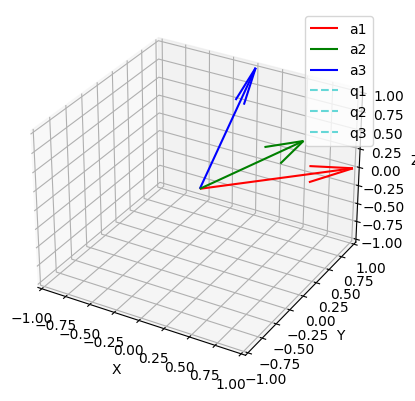

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plot the original vectors and the orthonormal basis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot original vectors
ax.quiver(0, 0, 0, a1[0], a1[1], a1[2], color='r', label='a1')
ax.quiver(0, 0, 0, a2[0], a2[1], a2[2], color='g', label='a2')
ax.quiver(0, 0, 0, a3[0], a3[1], a3[2], color='b', label='a3')

# Plot orthonormal basis vectors
for i, qi in enumerate(orthonormal_basis):
    ax.quiver(0, 0, 0, qi[0], qi[1], qi[2], color='c', alpha=0.6, linestyle='--', label=f'q{i+1}')

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

# **1.2.4. Eigenvalues and eigenvectors**

**1. Computing Eigenvalues and Eigenvectors**

To compute the eigenvalues and eigenvectors of a matrix, we will use the NumPy library.

In [ ]:
import numpy as np

# Define a square matrix A
A = np.array([[4, 1], [2, 3]])

# Compute eigenvalues and eigenvectors using NumPy
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Matrix A:")
print(A)
print("\nEigenvalues of A:")
print(eigenvalues)
print("\nEigenvectors of A:")
print(eigenvectors)

Matrix A:
[[4 1]
 [2 3]]

Eigenvalues of A:
[5. 2.]

Eigenvectors of A:
[[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]


**2. Example of a Matrix with No Real Eigenvalues**

The matrix from Example 1.2.22 in the book:

\
\begin{aligned}
A &= \begin{bmatrix}
0 & -1 \\
1 & 0
\end{bmatrix}
\end{aligned}

This matrix has no real eigenvalues. Let's demonstrate this:

In [ ]:
# Define the matrix A
A_no_real = np.array([[0, -1], [1, 0]])

# Compute eigenvalues and eigenvectors
eigenvalues_no_real, eigenvectors_no_real = np.linalg.eig(A_no_real)

print("\nMatrix A with no real eigenvalues:")
print(A_no_real)
print("\nEigenvalues of A (no real eigenvalues):")
print(eigenvalues_no_real)
print("\nEigenvectors of A (no real eigenvalues):")
print(eigenvectors_no_real)


Matrix A with no real eigenvalues:
[[ 0 -1]
 [ 1  0]]

Eigenvalues of A (no real eigenvalues):
[0.+1.j 0.-1.j]

Eigenvectors of A (no real eigenvalues):
[[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


**3. Diagonalization of Symmetric Matrices**

We will demonstrate the *diagonalization* of a symmetric matrix. Symmetric matrices have real eigenvalues, and they can be diagonalized using their eigenvectors.

In [ ]:
# Define a symmetric matrix A
A_symmetric = np.array([[2, 1], [1, 2]])

# Compute eigenvalues and eigenvectors
eigenvalues_symmetric, eigenvectors_symmetric = np.linalg.eig(A_symmetric)

# Diagonal matrix D
D = np.diag(eigenvalues_symmetric)

# Matrix P (eigenvectors)
P = eigenvectors_symmetric

# Verify the diagonalization A = PDP^(-1)
A_diagonalized = P @ D @ np.linalg.inv(P)

print("\nSymmetric Matrix A:")
print(A_symmetric)
print("\nEigenvalues of A:")
print(eigenvalues_symmetric)
print("\nEigenvectors of A:")
print(eigenvectors_symmetric)
print("\nDiagonal Matrix D:")
print(D)
print("\nPDP^(-1):")
print(A_diagonalized)


Symmetric Matrix A:
[[2 1]
 [1 2]]

Eigenvalues of A:
[3. 1.]

Eigenvectors of A:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Diagonal Matrix D:
[[3. 0.]
 [0. 1.]]

PDP^(-1):
[[2. 1.]
 [1. 2.]]


**4. Constrained Optimization using Eigenvalues**

We demonstrate *constrained optimization* where we minimize or maximize a quadratic form using the eigenvalues of a symmetric matrix.

In [ ]:
# Define a symmetric matrix A
A_symmetric = np.array([[2, 1], [1, 2]])

# Compute eigenvalues and eigenvectors
eigenvalues_symmetric, eigenvectors_symmetric = np.linalg.eig(A_symmetric)

# Constrained optimization: minimize and maximize the quadratic form
lambda_min = np.min(eigenvalues_symmetric)
lambda_max = np.max(eigenvalues_symmetric)
v_min = eigenvectors_symmetric[:, np.argmin(eigenvalues_symmetric)]
v_max = eigenvectors_symmetric[:, np.argmax(eigenvalues_symmetric)]

print("\nEigenvalues of A:")
print(eigenvalues_symmetric)
print("\nMinimum Eigenvalue (lambda_min):", lambda_min)
print("Eigenvector corresponding to lambda_min:")
print(v_min)
print("\nMaximum Eigenvalue (lambda_max):", lambda_max)
print("Eigenvector corresponding to lambda_max:")
print(v_max)

# Quadratic form minimization and maximization
print("\nMinimized quadratic form (x^T A x / x^T x):", lambda_min)
print("Maximized quadratic form (x^T A x / x^T x):", lambda_max)


Eigenvalues of A:
[3. 1.]

Minimum Eigenvalue (lambda_min): 1.0
Eigenvector corresponding to lambda_min:
[-0.70710678  0.70710678]

Maximum Eigenvalue (lambda_max): 3.0
Eigenvector corresponding to lambda_max:
[0.70710678 0.70710678]

Minimized quadratic form (x^T A x / x^T x): 1.0
Maximized quadratic form (x^T A x / x^T x): 3.0
